# Project: Wrangling and Analyze Data

## Data Gathering
In the cells below, I gathered **all** three pieces of data for this project and loaded them in the notebook. 

**Note:** the methods required to gather each data was different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import the required packages for the project

import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [2]:
# Display full column length

pd.set_option('display.max_colwidth', -1)

In [3]:
# Read WeRateDogs' Twitter archive data into a pandas DataFrame
df_twitterarchive = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Create a request to download tweet image predictions from Udacity's servers

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open(url.split('/')[-1], mode='wb').write(response.content)

335079

In [5]:
# Read the image predictions data into a DataFrame
df_imagepred = pd.read_csv(url.split('/')[-1], sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# df_twitterarchive is a DataFrame with the twitter_archive_enhanced.csv file.
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

tweet_ids = df_twitterarchive.tweet_id.values
len(tweet_ids)

2356

In [7]:
### I made the code here a comment as I was unable to get access to the Twitter API
### It also makes my code run slowly


# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet1_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [8]:
# Read the tweet_json file into a DataFrame
tweet_list = []
with open('tweet_json.txt') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)
        
df_tweet = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])

Code reference: https://alx-c3.slack.com/archives/C04C9DFH86B/p1673625283827479?thread_ts=1673616422.196509&cid=C04C9DFH86B

## Assessing Data
In this section, I detected and documented **nine (9) quality issues and three (3) tidiness issues**. I used **both** visual and programmatic assessement to assess the data.

**Note:** I paid attention to the following key points when I accessed the data.

* Only original ratings (no retweets) that have images are needed. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* Tweets beyond August 1st, 2017 don't need to be gathered. They can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing the Twitter archive DataFrame

In [9]:
df_twitterarchive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [10]:
df_twitterarchive.text.sample(20)

290     @markhoppus 182/10                                                                                                                                       
463     This is Ken. His cheeks are magic. 13/10 (IG: ken_shiba) https://t.co/btzf1zTDeQ                                                                         
959     This is Gilbert. He's being chased by a battalion of miniature floof cows. 10/10 we all believe in you Gilbert https://t.co/wayKZkDRTG                   
1634    Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3                           
987     This is Dietrich. He hops at random. Other doggos don't understand him. It upsets him greatly. 8/10 would comfort https://t.co/U8cSRz8wzC                
652     Meet BeBe. She rocks the messy bun of your dreams. H*ckin flawless. 12/10 would watch her tutorial https://t.co/of0pFNBIl8                               
2297    Here is Dave. He is 

In [11]:
df_twitterarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
df_twitterarchive.name.value_counts().head(30)

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
Lucy       11 
Lola       10 
Tucker     10 
Penny      10 
Winston    9  
Bo         9  
Sadie      8  
the        8  
Daisy      7  
Bailey     7  
an         7  
Buddy      7  
Toby       7  
Scout      6  
Jax        6  
Leo        6  
Koda       6  
Bella      6  
Oscar      6  
Rusty      6  
Milo       6  
Jack       6  
Dave       6  
Stanley    6  
Bentley    5  
Name: name, dtype: int64

In [13]:
df_twitterarchive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [14]:
df_twitterarchive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [15]:
df_twitterarchive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Assessing the image predictions DataFrame

In [16]:
df_imagepred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_imagepred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# The top predictions (values in the p1 column) 
df_imagepred.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                     89 
Chihuahua                    83 
pug                          57 
chow                         44 
Samoyed                      43 
toy_poodle                   39 
Pomeranian                   38 
malamute                     30 
cocker_spaniel               30 
French_bulldog               26 
Chesapeake_Bay_retriever     23 
miniature_pinscher           23 
seat_belt                    22 
Staffordshire_bullterrier    20 
German_shepherd              20 
Siberian_husky               20 
web_site                     19 
Cardigan                     19 
Eskimo_dog                   18 
Maltese_dog                  18 
Shetland_sheepdog            18 
beagle                       18 
teddy                        18 
Rottweiler                   17 
Lakeland_terrier             17 
Shih-Tzu                     17 
Italian_greyhound            16 
kuvasz                       16 
          

#### Assessing the tweet info DataFrame

In [20]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
df_tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [23]:
# Duplicated columns in all the DataFrames

columns = pd.Series(list(df_twitterarchive) + list(df_imagepred) + list(df_tweet))
columns[columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues
1. **df_twitterarchive** - The dataframe contains unnecessary columns and it has missing values in these columns: retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_user_id, and expanded_urls.


2. **df_twitterarchive** - The retweets and replies should be removed, leaving only the original tweets.


3. **df_twitterarchive** - There are invalid names in the archive data that need to be removed


4. **df_twitterarchive** - The **tweet_id column** should be an **object** dtype, **timestamp** should be a **datetime64** dtype.


5. **df_twitterarchive** - The column 'floofer' should be renamed 'floof' based on the **Dogtionary**. The column names 'rating_numerator' and 'rating_denominator' should be shortened.


6. **df_twitterarchive**: There are a few outliers in the numerator and denominator ratings. They have unusually high values like 558, 464 etc which are most likely inaccurate. The **rating_numerator** column should be of dtype **float** and also it should be correctly extracted


7. **df_imagepred** - There should be uniformity in the types of dogs in columns p1, p2, and p3, some of them are in uppercase while others are in lowercase letters.


8. **df_imagepred** - The tweet_id column should be **dtype object** instead of **int64**.


9. **df_imagepred** - A lot of the top predictions are other animals (not dogs) or random items.


10. **df_tweet** - The column **id_str** should be renamed to **tweet_id** to enable the tables to be merged.

### Tidiness issues
1. **df_imagepred:** The columns for the stages of dog (doggo, pupper, puppo, floof) should be one category column.


2. **df_tweet** and **df_twitterarchive** should be merged.


3. All three tables should be merged.

## Cleaning Data
In this section, I cleaned **all** of the issues I documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
archive_copy = df_twitterarchive.copy()
predict_copy = df_imagepred.copy()
tweet_copy = df_tweet.copy()

# Quality issues

### Issue #1: Missing values in columns and unnecessary columns in the archive data. 

### Issue #2: The retweets and replies should be removed, leaving only the original tweets in the archive data

#### Define: 
Drop the retweeted rows using the isnull( ) method on the **retweeted_status_id** column

Use the dropna( ) and drop( ) methods to remove the columns with missing values and drop source column from the **archive_copy** table respectively. 

#### Code

In [25]:
#Drop the retweeted rows
archive_copy = archive_copy[pd.isnull(archive_copy.retweeted_status_id)]
archive_copy = archive_copy[pd.isnull(archive_copy.in_reply_to_status_id)]

#Drop the unnecessary columns
archive_copy.dropna(axis='columns',how='any', inplace=True)
archive_copy.drop(columns='source', inplace=True)

#### Test

In [26]:
archive_copy.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None


In [27]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(7)
memory usage: 180.2+ KB


### Issue #3: There are invalid names in the archive data that need to be removed

#### Define:
In **archive_copy**, all invalid dog names start with lower case letters. Find all rows where names start with lower case letters using the **str.lower( )** function and set the name value for those rows to None using the **replace( )** method.

#### Code:

In [28]:
# Find all rows where names start with lower case letters
lowercase_names = archive_copy[archive_copy.name.str[0]==archive_copy.name.str[0].str.lower()]
lowercase_names

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,14,10,such,None,None,None,None
56,881536004380872706,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14,10,a,None,None,pupper,None
169,859196978902773760,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",12,10,quite,None,None,None,None
335,832645525019123713,2017-02-17 17:38:57 +0000,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,10,10,not,None,None,None,None
369,828650029636317184,2017-02-06 17:02:17 +0000,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14,10,one,None,None,None,None
542,806219024703037440,2016-12-06 19:29:28 +0000,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,11,10,incredibly,None,None,None,None
649,792913359805018113,2016-10-31 02:17:31 +0000,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,13,10,a,None,None,None,None
801,772581559778025472,2016-09-04 23:46:12 +0000,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,10,10,a,None,None,None,None
819,770655142660169732,2016-08-30 16:11:18 +0000,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,11,10,very,None,None,None,None


Code resource - https://stackoverflow.com/questions/55368594/how-to-get-indices-list-for-rows-starting-with-lower-case-letter

In [29]:
# List of invalid names
invalid_names = list(lowercase_names.name.unique())
invalid_names

['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [30]:
# replacing the invalid names with 'None'
archive_copy['name'] = archive_copy.name.replace(invalid_names, 'None')

#### Test:

In [31]:
archive_copy[archive_copy.name.str[0]==archive_copy.name.str[0].str.lower()]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: tweet_id has dtype int64 and should be object. timestamp should be a datetime64 dtype and the numerator rating column should be of dtype float in the archive data

#### Define:
In **archive_copy**, change the dtype of the timestamp column from object to datetime using the to_datetime( ) function. Change the dtype of the **tweet_id** column from int64 to object and the dtype of the **num_rate** column to float using the astype( ) function.

#### Code:

In [32]:
archive_copy['timestamp'] = pd.to_datetime(archive_copy['timestamp'])
archive_copy['tweet_id'] = archive_copy['tweet_id'].astype('str')
archive_copy['rating_numerator'] = archive_copy['rating_numerator'].astype('float')

#### Test:

In [33]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 180.2+ KB


### Issue #5: Rename the floofer column to 'floof' and shorten the rating_numerator and rating_denominator column names in the archive data

#### Define: 
Use the rename( ) function to rename floofer as "floof" and shorten the  rating_numerator and rating_denominator columns to "num_rate" and "denum_rate" respectively, in **archive_copy**

#### Code:

In [34]:
archive_copy.rename(columns={"floofer": "floof", 
                                         "rating_numerator": "num_rate",
                                         "rating_denominator": "denum_rate"}, inplace=True)

#### Test:

In [35]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id      2097 non-null object
timestamp     2097 non-null datetime64[ns]
text          2097 non-null object
num_rate      2097 non-null float64
denum_rate    2097 non-null int64
name          2097 non-null object
doggo         2097 non-null object
floof         2097 non-null object
pupper        2097 non-null object
puppo         2097 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 180.2+ KB


### Issue #6: There are a few outliers in the numerator and denominator ratings in the archive data. They have unusually high values like 558, 464 etc which are most likely inaccurate. The numerator rating isn't correctly extracted

#### Define: 
In **archive_copy**, correctly extract the values of the **num_rate** column using a regex. Use the iloc function to replace wrong ratings. Use the string, extract all & query methods to resolve the wrongly extracted ratings. Use arithmetic operators to keep rows where numerator is between 1-15 and the denominator is 10

#### Code:

In [36]:
# Use the default index of the dataframe to clean the data
archive_copy.reset_index(inplace=True, drop=True)

# Find the ratings with decimal values
archive_copy[archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'num_rate']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


,text,num_rate
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [37]:
archive_copy.iloc[[41, 528, 586, 1474], [2,3,4]]

,text,num_rate,denum_rate
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10


In [38]:
# Replace the wrongly extracted ratings

archive_copy.iloc[41, 3] = 13.5
archive_copy.iloc[528, 3] = 9.75
archive_copy.iloc[586, 3] = 11.27
archive_copy.iloc[1474, 3] = 11.26

In [39]:
# Use the extract all method to display all the rating fractions
num_denum = archive_copy.text.str.extractall(r"(\d+\d*\/\d+)")
num_denum.head(15)

,,0
,match,
0,0,13/10
1,0,13/10
2,0,12/10
3,0,13/10
4,0,12/10
5,0,13/10
6,0,13/10
7,0,13/10
8,0,13/10


In [40]:
# Use the query function to extract the ratings with a match value of 1
# These are ratings that were also wrongly extracted

num_denum_1 = num_denum.query("match == 1")
num_denum_1.head(10)

,,0
,match,
588,1,11/10
797,1,7/10
853,1,14/10
948,1,13/10
985,1,11/10
1005,1,8/10
1136,1,2/10
1234,1,13/10
1239,1,5/10


In [41]:
# Get the index values of num_denum_1 using the index and labels functions
num_denum_1.index.labels

FrozenList([[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 1294, 1307, 1426, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922, 1960, 2005, 2014, 2047, 2076], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [42]:
# use the iloc function display the rows with the ratings that were extracted erroneously
# using the index values above
archive_copy.iloc[[588, 797, 853, 948, 985, 1005, 1136, 1234, 1239, 1278, 1294, 1307,
                    1426, 1556, 1592, 1649, 1653, 1719, 1759, 1811, 1860, 1922, 1960, 
                    2005, 2014, 2047, 2076], [2,3,4,5]]

,text,num_rate,denum_rate,name
588,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12.0,10,None
797,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10.0,10,Bookstore
853,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,None
948,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,None
985,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,Bluebert
1005,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10.0,10,Travis
1136,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9.0,10,Socks
1234,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.0,10,None
1239,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10.0,10,Oliviér
1278,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5.0,10,None


In [43]:
# There are 27 rows represented above
# 5 rows had wrongly extracted ratings
# 22 rows had double ratings, where one rating was extracted

# resolving the 5 wrongly extracted ratings
# erroneous rating - 9/11
archive_copy.iloc[853, 3] = 14
archive_copy.iloc[853, 4] = 10

# erroneous rating - 4/20
archive_copy.iloc[948, 3] = 13
archive_copy.iloc[948, 4] = 10

# erroneous rating - 50/50
archive_copy.iloc[985, 3] = 11
archive_copy.iloc[985, 4] = 10

# erroneous rating - 7/11
archive_copy.iloc[1426, 3] = 10
archive_copy.iloc[1426, 4] = 10

# erroneous rating - 1/2
archive_copy.iloc[2076, 3] = 9
archive_copy.iloc[2076, 4] = 10

In [44]:
# Keep rows where numerator is between 1-15 and the denominator is 10
archive_copy = archive_copy[(archive_copy.num_rate > 0) & (archive_copy.num_rate < 16) &
                          (archive_copy.denum_rate == 10)]

#### Test:

In [45]:
# Find the decimal ratings
archive_copy[archive_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'num_rate']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,num_rate
41,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
528,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
586,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1474,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [46]:
 archive_copy.iloc[[853, 948, 985, 1426, 2076], [2,3,4,5]]

,text,num_rate,denum_rate,name
858,Say hello to Rorie. She's zen af. Just enjoying a treat in the sunlight. 10/10 would immediately trade lives with https://t.co/yctnFptdQ1,10.0,10,Rorie
954,Garden's coming in nice this year. 10/10 https://t.co/5Lra3e4rrw,10.0,10,None
991,This is Bentley. He gives kisses back. 11/10 precious af (vid by @emmaallen25) https://t.co/9PnKkKzoUp,11.0,10,Bentley
1438,This is Samson. He patrols his waters on the back of his massive shielded battle dog. 11/10 https://t.co/f8dVgDYDFf,11.0,10,Samson
2091,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,10.0,10,None


In [47]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id      2082 non-null object
timestamp     2082 non-null datetime64[ns]
text          2082 non-null object
num_rate      2082 non-null float64
denum_rate    2082 non-null int64
name          2082 non-null object
doggo         2082 non-null object
floof         2082 non-null object
pupper        2082 non-null object
puppo         2082 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 178.9+ KB


In [48]:
archive_copy.num_rate.value_counts()

12.00    486
10.00    437
11.00    414
13.00    288
9.00     153
8.00     98 
7.00     51 
14.00    39 
5.00     33 
6.00     32 
3.00     19 
4.00     15 
2.00     9  
1.00     4  
11.27    1  
13.50    1  
11.26    1  
9.75     1  
Name: num_rate, dtype: int64

In [49]:
archive_copy.denum_rate.value_counts()

10    2082
Name: denum_rate, dtype: int64

### Issue #7: There should be uniformity in the types of dogs in columns p1, p2, and p3, some of them are in uppercase while others are in lowercase letters.

#### Define: 
Use the str.lower( ) method to convert all the names in p1, p2, and p3 to lowercase letters in **predict_copy**

#### Code:

In [50]:
predict_copy['p1'] = predict_copy['p1'].str.lower()
predict_copy['p2'] = predict_copy['p2'].str.lower()
predict_copy['p3'] = predict_copy['p3'].str.lower()

#### Test:

In [51]:
predict_copy.p1.head()

0    welsh_springer_spaniel
1    redbone               
2    german_shepherd       
3    rhodesian_ridgeback   
4    miniature_pinscher    
Name: p1, dtype: object

In [52]:
predict_copy.p2.head()

0    collie            
1    miniature_pinscher
2    malinois          
3    redbone           
4    rottweiler        
Name: p2, dtype: object

In [53]:
predict_copy.p3.head()

0    shetland_sheepdog  
1    rhodesian_ridgeback
2    bloodhound         
3    miniature_pinscher 
4    doberman           
Name: p3, dtype: object

### Issue #8:  The tweet_id column should be dtype object instead of int64 in the predict data

#### Define: 
Change the dtype of the tweet_id column from int64 to object using the astype() function in **predict_copy**

#### Code:

In [54]:
predict_copy['tweet_id'] = predict_copy['tweet_id'].astype('str')

#### Test:

In [55]:
predict_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #9:  A lot of the top predictions are other animals (not dogs) or random items.

#### Define: 
Drop rows where all predictions is not a breed of dog in **predict_copy**

#### Code:

In [56]:
#checking where p1_dog is false

predict_copy[predict_copy.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,chihuahua,8.695060e-02,True


In [57]:
#droping rows were p1_dog is False
predict_copy = predict_copy[~(predict_copy.p1_dog == False)]

#### Test:

In [58]:
predict_copy.p1_dog.value_counts()

True    1532
Name: p1_dog, dtype: int64

In [59]:
predict_copy[predict_copy.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #10: The column "id_str" should be changed to "tweet_id" so merging tables will be smoother.

#### Define:
Use the rename(  ) function to change the **id_str** column name to **tweet_id**.

#### Code:

In [60]:
tweet_copy.rename(index=str, columns={"id": "tweet_id"}, inplace=True)

#### Test:

In [61]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 73.6+ KB


# Tidiness issues

### Issue #1: The four columns of dog stages should be one category column in the archive data

#### Define:
In **archive_copy**, empty strings should be used in place of 'None', this can be done using the replace( ) method. Create a new column (dog_stages) by concatenating the 4 dog stages column into one. Subsequently drop the 4 dog stages columns using the .drop( ) method and replace the empty stings with 'None' using the replace( ) method

#### Code:

In [62]:
# replacing the None values with empty string
archive_copy[['doggo','floof', 'pupper', 'puppo']] = archive_copy[['doggo','floof', 'pupper', 'puppo']].replace('None', '')

In [63]:
# concatenating the four dog stages column
archive_copy['dog_stages'] = archive_copy['doggo'] + archive_copy['floof'] + archive_copy['pupper'] + archive_copy['puppo']

In [64]:
# Dropping the four dog stages column
archive_copy.drop(['floof', 'doggo', 'pupper', 'puppo'], axis = 1, inplace = True)

In [65]:
# replacing the empty string spaces with None in the dog_stages column
archive_copy['dog_stages'] = archive_copy.dog_stages.replace('', 'None')

#### Test:

In [66]:
archive_copy.sample(5)

,tweet_id,timestamp,text,num_rate,denum_rate,name,dog_stages
1457,681261549936340994,2015-12-27 23:53:05,Say hello to Panda. He's a Quackadilly Shooster. Not amused by your fake ball throwing motion. 9/10 would hug lots https://t.co/wL1iDvbcVk,9.0,10,Panda,None
1580,676588346097852417,2015-12-15 02:23:26,This is Bubbles. He kinda resembles a fish. Always makes eye contact with u no matter what. Sneaky tongue slip. 5/10 https://t.co/Nrhvc5tLFT,5.0,10,Bubbles,None
1353,687096057537363968,2016-01-13 02:17:20,This pupper's New Year's resolution was to become a Hershey's kiss. 11/10 she's super pumped about it https://t.co/D7jYj6vdwC,11.0,10,None,pupper
1689,673887867907739649,2015-12-07 15:32:42,When you're having a great time sleeping and your mom comes in and turns on the lights. 10/10 https://t.co/6qYd6BNSPd,10.0,10,None,None
1211,697270446429966336,2016-02-10 04:06:43,This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS,10.0,10,Bentley,None


### Issue #2: df_tweet (tweet_copy) and df_twitterarchive (archive_copy) tables should be merged as this is related data.

#### Define: 
Use the join( ) method on the **tweet_id** column to merge **archive_copy** and **tweet_copy** tables into one table.

#### Code:

In [67]:
#Convert 'tweet_id' in tweet_copy to a string before merge
tweet_copy['tweet_id'] = tweet_copy['tweet_id'].astype('str')

archive_tweet_merge = archive_copy.join(tweet_copy.set_index('tweet_id'), on='tweet_id')

#### Test:

In [68]:
archive_tweet_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2096
Data columns (total 9 columns):
tweet_id          2082 non-null object
timestamp         2082 non-null datetime64[ns]
text              2082 non-null object
num_rate          2082 non-null float64
denum_rate        2082 non-null int64
name              2082 non-null object
dog_stages        2082 non-null object
retweet_count     2082 non-null int64
favorite_count    2082 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 162.7+ KB


### Issue #3: All three tables will eventually be merged into one.

#### Define: 
Take the newly merged **archive_tweet_merge** table and combine with the **predict_copy** table using the join( ) method on the **tweet_id** column.

#### Code:

In [69]:
#pat_merge - pat stands for predict, archive, tweet
pat_merge = archive_tweet_merge.join(predict_copy.set_index('tweet_id'), on='tweet_id')

#### Test:

In [70]:
pat_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2096
Data columns (total 20 columns):
tweet_id          2082 non-null object
timestamp         2082 non-null datetime64[ns]
text              2082 non-null object
num_rate          2082 non-null float64
denum_rate        2082 non-null int64
name              2082 non-null object
dog_stages        2082 non-null object
retweet_count     2082 non-null int64
favorite_count    2082 non-null int64
jpg_url           1453 non-null object
img_num           1453 non-null float64
p1                1453 non-null object
p1_conf           1453 non-null float64
p1_dog            1453 non-null object
p2                1453 non-null object
p2_conf           1453 non-null float64
p2_dog            1453 non-null object
p3                1453 non-null object
p3_conf           1453 non-null float64
p3_dog            1453 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(11)
memory usage: 341.6+ KB


### Issue: missing rows in the pat_merge table

#### Define:
Remove the missing rows from the merged tables using the drop( ) method.

#### Code:

In [71]:
#Create a copy of the merged table
pat_merge_copy = pat_merge.copy()

In [72]:
drop_1 = pat_merge_copy[pd.isnull(pat_merge_copy['jpg_url'])].index
drop_1

Int64Index([   0,    3,   21,   27,   32,   38,   48,   52,   53,   61,
            ...
            2053, 2063, 2067, 2071, 2074, 2075, 2078, 2079, 2088, 2090],
           dtype='int64', length=629)

In [73]:
pat_merge_copy.drop(index=drop_1, inplace=True)

In [74]:
drop_2 = pat_merge_copy[pd.isnull(pat_merge_copy['retweet_count'])].index
drop_2

Int64Index([], dtype='int64')

In [75]:
pat_merge_copy.drop(index=drop_2, inplace=True)

#### Test:

In [76]:
pat_merge_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 2096
Data columns (total 20 columns):
tweet_id          1453 non-null object
timestamp         1453 non-null datetime64[ns]
text              1453 non-null object
num_rate          1453 non-null float64
denum_rate        1453 non-null int64
name              1453 non-null object
dog_stages        1453 non-null object
retweet_count     1453 non-null int64
favorite_count    1453 non-null int64
jpg_url           1453 non-null object
img_num           1453 non-null float64
p1                1453 non-null object
p1_conf           1453 non-null float64
p1_dog            1453 non-null object
p2                1453 non-null object
p2_conf           1453 non-null float64
p2_dog            1453 non-null object
p3                1453 non-null object
p3_conf           1453 non-null float64
p3_dog            1453 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(11)
memory usage: 238.4+ KB


In [77]:
pat_merge_copy.head(30)

,tweet_id,timestamp,text,num_rate,denum_rate,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,None,None,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1.0,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,Jax,None,2158,12041,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1.0,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,None,None,16716,56848,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2.0,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,None,4429,28226,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1.0,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
10,890006608113172480,2017-07-26 00:31:25,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,13.0,10,Koda,None,7624,31166,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1.0,samoyed,0.957979,True,pomeranian,0.013884,True,chow,0.008167,True
11,889880896479866881,2017-07-25 16:11:53,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,13.0,10,Bruno,None,5156,28268,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1.0,french_bulldog,0.377417,True,labrador_retriever,0.151317,True,muzzle,0.082981,False


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [78]:
pat_merge_copy.to_csv(path_or_buf='twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled data, producing **five (5) insights and one (1) visualization.**

In [79]:
pat_merge_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 2096
Data columns (total 20 columns):
tweet_id          1453 non-null object
timestamp         1453 non-null datetime64[ns]
text              1453 non-null object
num_rate          1453 non-null float64
denum_rate        1453 non-null int64
name              1453 non-null object
dog_stages        1453 non-null object
retweet_count     1453 non-null int64
favorite_count    1453 non-null int64
jpg_url           1453 non-null object
img_num           1453 non-null float64
p1                1453 non-null object
p1_conf           1453 non-null float64
p1_dog            1453 non-null object
p2                1453 non-null object
p2_conf           1453 non-null float64
p2_dog            1453 non-null object
p3                1453 non-null object
p3_conf           1453 non-null float64
p3_dog            1453 non-null object
dtypes: datetime64[ns](1), float64(5), int64(3), object(11)
memory usage: 238.4+ KB


In [80]:
# Basic statistic data of the wrangled data
pat_merge_copy.describe()

,num_rate,denum_rate,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,1453.000000,1453.0,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1.453000e+03
mean,10.917949,10.0,2811.458362,9364.255334,1.213352,0.614239,0.141534,6.170592e-02
std,1.687984,0.0,4798.150099,12676.056988,0.574876,0.260356,0.102870,5.277106e-02
min,2.000000,10.0,16.000000,81.000000,1.000000,0.044333,0.000023,2.160900e-07
25%,10.000000,10.0,654.000000,2203.000000,1.000000,0.392108,0.056775,1.499680e-02
50%,11.000000,10.0,1445.000000,4543.000000,1.000000,0.615163,0.127931,4.981050e-02
75%,12.000000,10.0,3285.000000,11901.000000,1.000000,0.852088,0.204177,9.521820e-02
max,14.000000,10.0,79515.000000,132810.000000,4.000000,0.999956,0.467678,2.734190e-01


In [81]:
# The highest retweeted tweet
pat_merge_copy[pat_merge_copy['retweet_count'] == pat_merge_copy.retweet_count.max()]

,tweet_id,timestamp,text,num_rate,denum_rate,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
825,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13.0,10,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1.0,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [82]:
# The most favorited tweet
pat_merge_copy[pat_merge_copy['favorite_count'] == pat_merge_copy.favorite_count.max()]

,tweet_id,timestamp,text,num_rate,denum_rate,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
325,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13.0,10,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True


In [83]:
#checking for the tweet(s) with the highest rating_num
pat_merge_copy[pat_merge_copy['num_rate'] == pat_merge_copy.num_rate.max()]

,tweet_id,timestamp,text,num_rate,denum_rate,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,doggo,7711,32467,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1.0,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True
37,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",14.0,10,None,None,5856,27478,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1.0,pembroke,0.993225,True,cardigan,0.003216,True,chihuahua,0.002081,True
51,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,14.0,10,None,pupper,16570,50199,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1.0,samoyed,0.281463,True,angora,0.272066,False,persian_cat,0.114854,False
67,878057613040115712,2017-06-23 01:10:23,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,14.0,10,Emmy,None,7181,42876,https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1.0,french_bulldog,0.839097,True,boston_bull,0.078799,True,toy_terrier,0.015243,True
152,856282028240666624,2017-04-23 23:01:59,"This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. Watered every day so they can grow. 14/10 for all https://t.co/GUefqUmZv8",14.0,10,Cermet,None,6841,29086,https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg,4.0,chihuahua,0.876543,True,italian_greyhound,0.032962,True,cardigan,0.020776,True
160,854120357044912130,2017-04-17 23:52:16,Sometimes you guys remind me just how impactful a pupper can be. Cooper will be remembered as a good boy by so many. 14/10 rest easy friend https://t.co/oBL7LEJEzR,14.0,10,None,pupper,8285,33911,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4.0,black-and-tan_coonhound,0.854861,True,doberman,0.050792,True,bluetick,0.021762,True
267,832273440279240704,2017-02-16 17:00:25,Say hello to Smiley. He's a blind therapy doggo having a h*ckin blast high steppin around in the snow. 14/10 would follow anywhere https://t.co/SHAb1wHjMz,14.0,10,Smiley,doggo,2673,12385,https://pbs.twimg.com/ext_tw_video_thumb/832273373149413377/pu/img/qOqxM0b48fEarmq6.jpg,1.0,pembroke,0.134081,True,ice_bear,0.051928,False,pug,0.044311,True
270,831911600680497154,2017-02-15 17:02:36,Meet Kuyu. He was trapped in a well for 10 days. Rescued yesterday using a device designed by a local robotics team. 14/10 for all involved https://t.co/l38R6IZNNg,14.0,10,Kuyu,None,7458,30380,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg,4.0,bloodhound,0.777562,True,great_dane,0.047418,True,leonberg,0.017943,True
289,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",14.0,10,None,None,1544,10467,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1.0,golden_retriever,0.649209,True,chesapeake_bay_retriever,0.198560,True,vizsla,0.056200,True
292,828381636999917570,2017-02-05 23:15:47,Meet Doobert. He's a deaf doggo. Didn't stop him on the field tho. Absolute legend today. 14/10 would pat head approvingly https://t.co/iCk7zstRA9,14.0,10,Doobert,doggo,2554,13864,https://pbs.twimg.com/media/C38Asz1WEAAvzj3.jpg,1.0,bedlington_terrier,0.392535,True,labrador_retriever,0.089022,True,clumber,0.081800,True


In [84]:
# Check for correlation

pat_merge_copy.corr()

,num_rate,denum_rate,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
num_rate,1.000000,NaN,0.342429,0.457029,0.199742,0.103154,-0.016243,-0.046127
denum_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.342429,NaN,1.000000,0.911024,0.092571,0.051738,-0.017286,-0.049562
favorite_count,0.457029,NaN,0.911024,1.000000,0.129384,0.076494,-0.022873,-0.057765
img_num,0.199742,NaN,0.092571,0.129384,1.000000,0.203817,-0.172500,-0.130067
p1_conf,0.103154,NaN,0.051738,0.076494,0.203817,1.000000,-0.560899,-0.741785
p2_conf,-0.016243,NaN,-0.017286,-0.022873,-0.172500,-0.560899,1.000000,0.468861
p3_conf,-0.046127,NaN,-0.049562,-0.057765,-0.130067,-0.741785,0.468861,1.000000


In [85]:
pat_merge_copy.p1.value_counts().head(10)

golden_retriever      135
labrador_retriever    91 
pembroke              88 
chihuahua             78 
pug                   54 
chow                  41 
samoyed               40 
pomeranian            38 
toy_poodle            37 
malamute              29 
Name: p1, dtype: int64

In [86]:
pat_merge_copy.p1.value_counts().tail(10)

toy_terrier                2
giant_schnauzer            2
black-and-tan_coonhound    2
clumber                    1
silky_terrier              1
standard_schnauzer         1
entlebucher                1
scotch_terrier             1
japanese_spaniel           1
groenendael                1
Name: p1, dtype: int64

### Insights:
1. There is a strong positive correlation between retweet_count and favorite_count with a correlation coefficent of 0.911024.

2. The prediction of the neural network was quite effective as the first predicted value(p1) has a higher mean and max value than the subsequent predictions (p2 & p3).

3. The golden_retriever was the most predicted dog type with a total of 135 out of 1453 predictions 

4. The highest retweeted tweet was belonged to a doggo while the most favorited tweet was a puppo.

5. Tweets that categorized the dogs as 'doggo and puppo' received the most likes on an average basis.

### Visualization

In [87]:
pat_merge_copy.dog_stages.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

In [88]:
# find the average likes by dog stage
dog_likes = pat_merge_copy[['dog_stages', 'favorite_count']]
dog_likes = dog_likes.query('dog_stages != ""')
dog_likes = dog_likes.groupby('dog_stages').mean()

#Determing the x and y axis volumes to be used in visualizing the data
x = list(dog_likes.index.str.capitalize())
y = list(dog_likes.favorite_count)

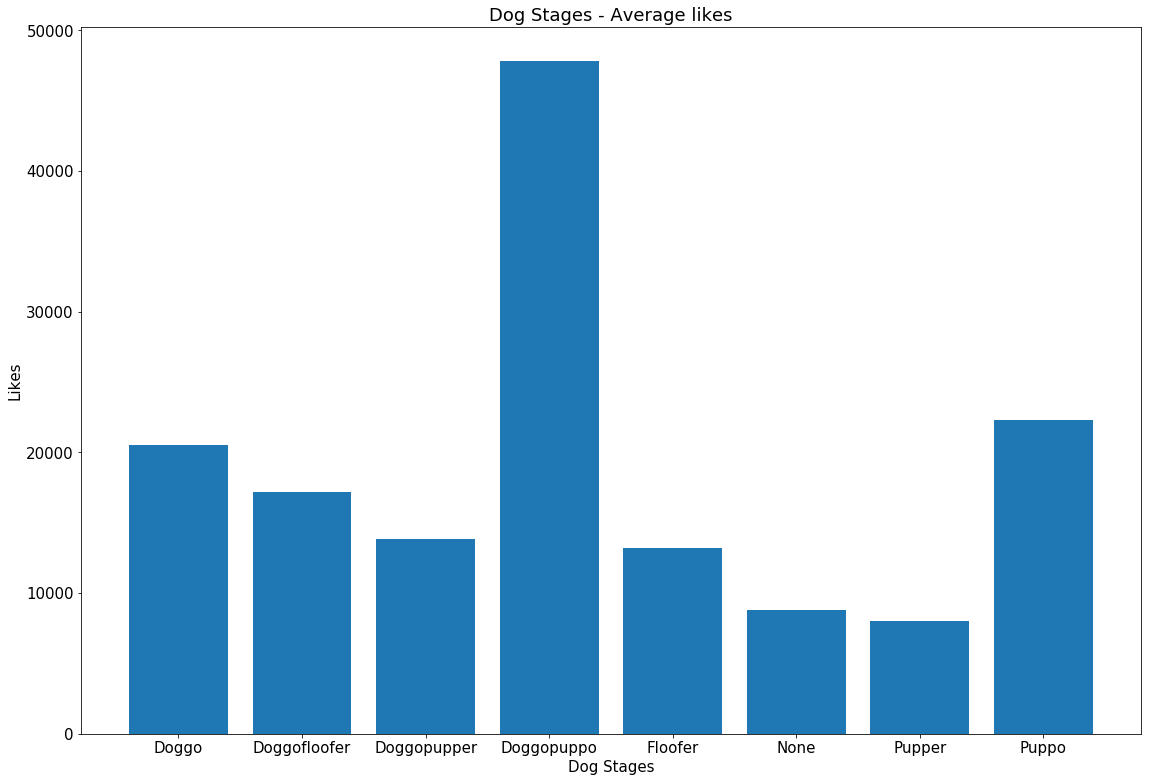

In [89]:
# plot results on a bar graph

plt.figure(figsize=(19, 13))
plt.rcParams.update({'font.size': 15})
plt.title('Dog Stages - Average likes')
plt.xlabel('Dog Stages')
plt.ylabel('Likes')
plt.bar(x, y)
plt.savefig('likes_dog_stage.png');